In [17]:
# 19/12/2024

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [18]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/videos/"

# ruta para colab
os.chdir(path)

# ruta en local
# os.chdir("../datos")

In [20]:
def mostrar(imagen):

    # cambiar a RGB
    if(len(imagen.shape)==3):
        imagen = imagen[...,::-1]

    plt.imshow(imagen)
    plt.show()

Cargar un vídeo desde un fichero

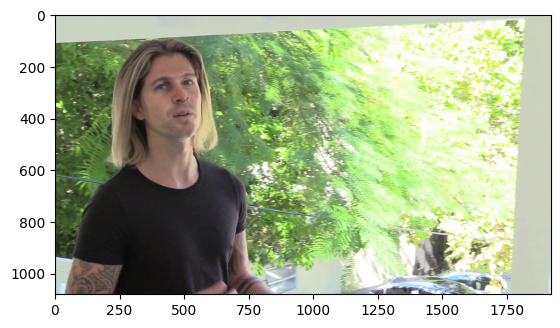

(1080, 1920, 3)


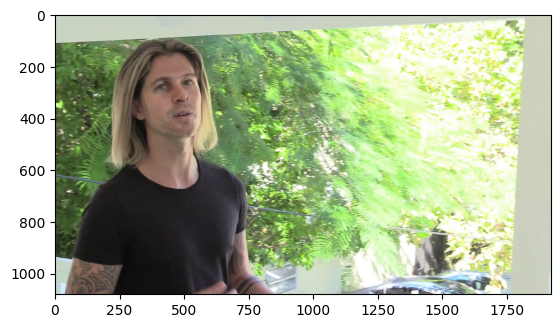

(1080, 1920, 3)


In [21]:
cap = cv.VideoCapture('aagfhgtpmv.mp4')

i = 0

while cap.isOpened():
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    mostrar(frame)
    print(frame.shape)

    if i == 1:
        break

    i = i + 1

cap.release()
cv.destroyAllWindows()

Lo mismo mostrando el vídeo en blanco y negro

In [22]:
cap = cv.VideoCapture('aagfhgtpmv.mp4')

i = 0

while cap.isOpened():

    ret, frame = cap.read()
    # if frame is read correctly ret is True

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    mostrar(gray)

    if i == 10:
        break

    i = i + 1

cap.release()
cv.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

Ahora vamos a crear un vídeo como el original pero rotado
Cogemos las dimensiones de la salida anterior

In [23]:
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('volteado.mp4', fourcc, 25.0, (1920, 1080))

In [24]:
cap = cv.VideoCapture('aagfhgtpmv.mp4')

i = 0

while cap.isOpened():

    ret, frame = cap.read()
    # if frame is read correctly ret is True

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    frame = cv.flip(frame, 0)
    out.write(frame)
    i = i + 1

cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


Pasar el vídeo a un tensor de numpy

In [25]:
filename = "aagfhgtpmv.mp4"

In [26]:
video = cv.VideoCapture(filename)
frames = []

while video.isOpened():
    (grabbed1, frame1) = video.read()
    # check to see if we have reached the end of the video

    if not grabbed1:
      print("Se alcanzó el final del vídeo: " + filename + " ")
      break

    frames.append(frame1)


frames = np.array(frames)
print(frames.shape)
np.save(filename, frames)

Se alcanzó el final del vídeo: aagfhgtpmv.mp4 
(300, 1080, 1920, 3)


Ocupa mucho más, pero si cargamos ese fichero se puede acceder a cualquier frame directamente

In [27]:
videocargado = np.load("aagfhgtpmv.mp4.npy")

In [28]:
videocargado.shape

(300, 1080, 1920, 3)

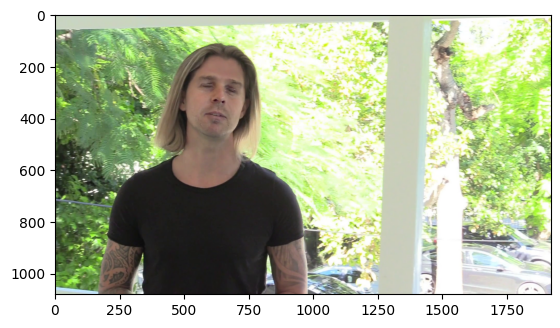

In [29]:
mostrar(videocargado[32])

También puede servir para aplicar una operación a todos los frames a la vez

In [30]:
rotado = np.rot90(videocargado, 1, axes = (1,2))

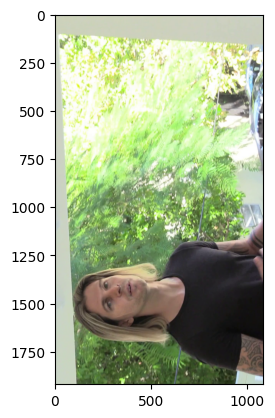

In [31]:
mostrar(rotado[0])

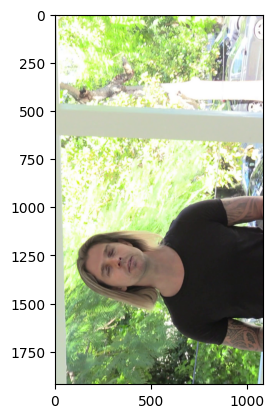

In [32]:
mostrar(rotado[32])